# LGM VIRTUAL  INTERNSHIP

# TASK-1 Iris Flower Classification



# IMPORTING LIBRARIES

In [98]:
#standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [99]:
sns.set()

# LOAD DATA
Let's load data the iris flower dataset using scikit-learn built in datasets


In [100]:
df = pd.read_csv("iris.csv",
names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])                 



In [101]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [103]:
#TO DISPLAY STATS OF DATASETS
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
# TO DISPLAY BASIC INFO
df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [105]:
# TO DISPLAY NO. OF SAMPLES ON EACH CLASS
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Preprocessing the dataset


In [106]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

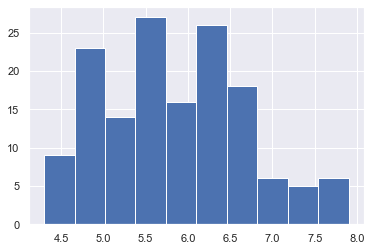

In [107]:
#HISTOGRAMS

df['SepalLengthCm'].hist()

<AxesSubplot:>

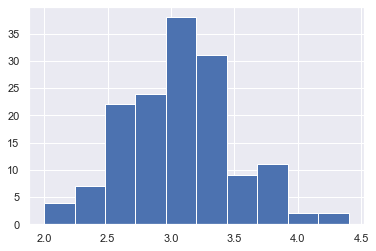

In [108]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

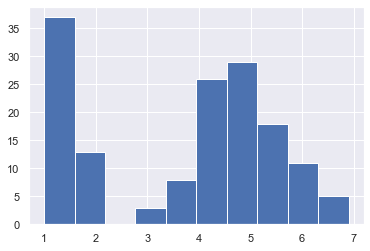

In [109]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

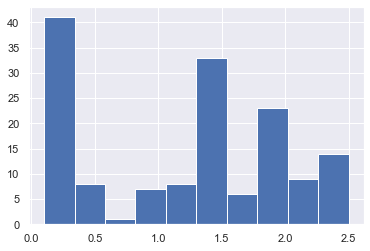

In [92]:
df['PetalWidthCm'].hist()

In [121]:
#SCATTERPLOT
colors = ['red', 'orange', 'blue']
Species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

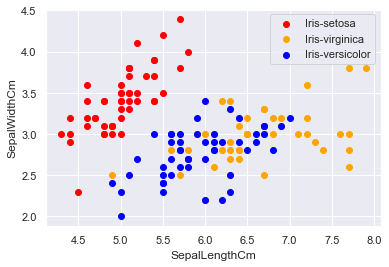

In [122]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = Species[i])
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")
    plt.legend()

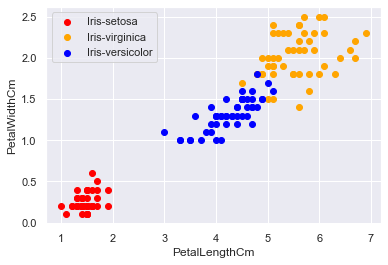

In [123]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
    plt.xlabel("PetalLengthCm")
    plt.ylabel("PetalWidthCm")
    plt.legend()

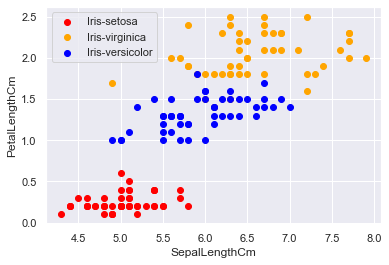

In [130]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
    plt.xlabel("SepalLengthCm")
    plt.ylabel("PetalLengthCm")
    plt.legend()

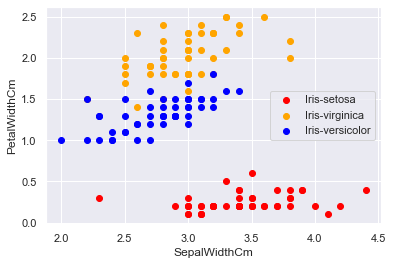

In [131]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = Species[i])
    plt.xlabel("SepalWidthCm")
    plt.ylabel("PetalWidthCm")
    plt.legend()

# Coorelation

In [132]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Heatmap

<AxesSubplot:>

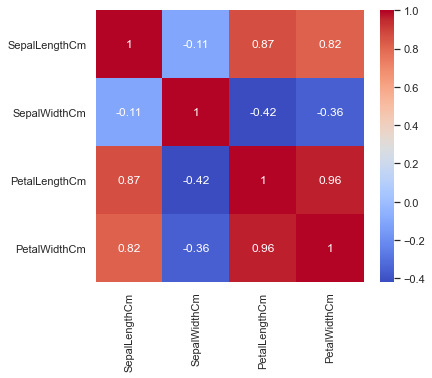

In [135]:
corr = df.corr()
figure, ax = plt.subplots(figsize = (6,5))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

# Label Encoder

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [160]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [171]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [172]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [173]:
model.fit(x_train, y_train)

LogisticRegression()

In [174]:
# Print metric to get performance
print("Accuracy: ", model.score(x_test, y_test))

Accuracy:  0.9555555555555556


In [175]:
#K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [176]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [177]:
# Print metric to get performance
print("Accuracy: ", model.score(x_test, y_test))

Accuracy:  0.9777777777777777
